# 📝Week 10 - Lab Intro

In this lab introduction we will discuss visualizing data. We will also go exceptions.

## Visualizing data
### Important packages for visualizing data
Many of the packages you have worked with are common tools data scientists use to visualize data

In [108]:
import numpy as np 
import matplotlib.pyplot as plt 

### Creating a subplot

You can create a figure and a grid of subplots with a single call, while providing reasonable control over how the individual plots are created with the following code:

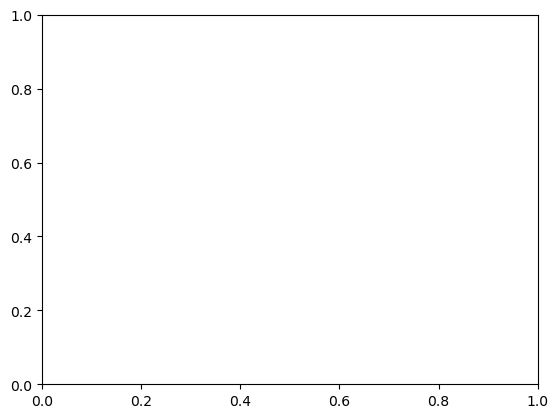

In [109]:
fig, ax = plt.subplots() 

By default, plt.subplot creates a 1x1 figure, but you can create a grid of figures or change the size

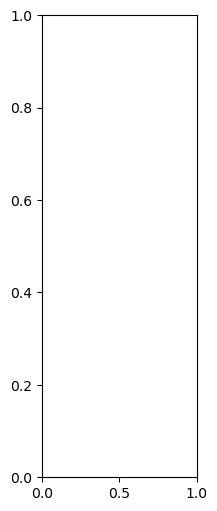

In [110]:
fig, ax = plt.subplots(figsize=(2,6)) #change the size of the figure 

Classes can contain various attributes, including variables and functions.

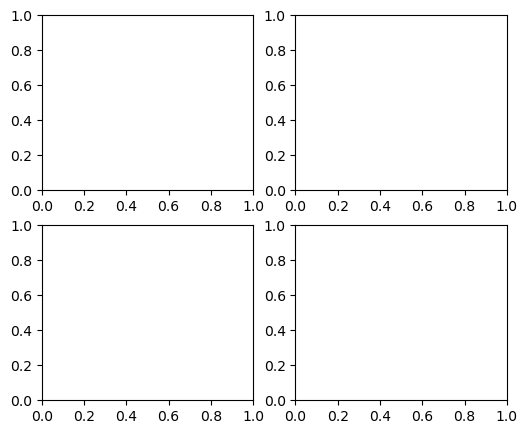

In [111]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(6,5)) #create a grid of figures by using nrows and ncols

### Making your plot pretty
We can create many different types of plots in python such as scatter plots and line plots. 
We also have the ablity to change the color of the plot, add a legend, add a x-label, y-label, and title
We can also change the bounds of the x-axis and y-axis 

(0.0, 35.0)

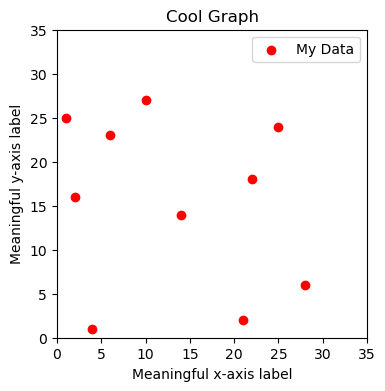

In [112]:
#Create some random data to play around with
import random
x_data = random.sample(range(1, 30), 10) #creates a list of length 10 with random numbers between 1 and 30
y_data = random.sample(range(1, 30), 10)

#Plotting example
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(x_data, y_data, color = 'red', label = 'My Data')
ax.legend() 
ax.set_title('Cool Graph')
ax.set_xlabel('Meaningful x-axis label')
ax.set_ylabel('Meaningful y-axis label')
ax.set_xlim(0,35)
ax.set_ylim(0,35)

### Curve Fitting
Often in data science we want to fit a function to our data. We can do this with the curve fitting tool in the scipy package.

Curve fitting is a type of optimization that finds an optimal set of parameters for a defined function that best fits a given set of observations.

Curve fitting requires that you define the function that maps examples of inputs to outputs.


In [113]:
from scipy.optimize import curve_fit #import curve fitting

#define a function
def func(x, a, b): 
    return a * np.sin(b * x)

#create some data
x_data = np.linspace(0, 10, num = 40)
y_data = 3.45 * np.sin(1.334 * x_data) + np.random.normal(size = 40)

#get best fit parameters
popt, pcov = curve_fit(func, x_data, y_data)

#lets see what is inside
print(popt, pcov)


[3.47846775 1.33967416] [[ 3.29981276e-02 -4.34623807e-05]
 [-4.34623807e-05  7.01260979e-05]]


popt is an array containing the optimized coefficients 
i.e., popt[0] is the optimized a value and popt[1] is the optimized b value

pcov is an array containing the covariance of coefficients
covarience measures the total variation of two random variables from their expected values. 
You'll learn more about this in statistics 

We will mostly care about the popt variable to create our best fit curve

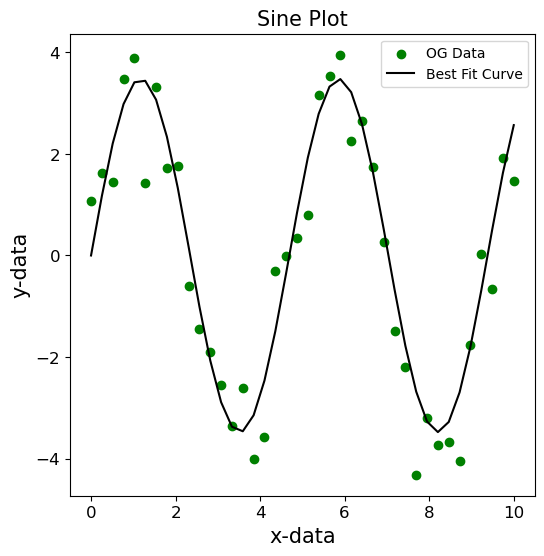

In [114]:
#create optimized y-data for best fit curve
opt_y = func(x_data,*popt) #popt[0]*np.sin(popt[1]*x_data)

#lets plot it
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(x_data,y_data, color = 'green', label ='OG Data') #Plot original data

ax.plot(x_data,opt_y, color = 'black', label = 'Best Fit Curve') #Plot best fit curve on same plot

#Make it pretty 
ax.legend()
ax.set_title('Sine Plot', size = 15) #changing the font size to 15 here with the size parameter 
ax.set_xlabel('x-data', size = 15)
ax.set_ylabel('y-data', size = 15)
ax.tick_params(axis='x', labelsize=12) #one of many ways you can change the tick label sizes
ax.tick_params(axis='y', labelsize=12)


## Exceptions



When an error occurs, or exception as we call it, Python will normally stop and generate an error message. These exceptions can be handled using the try statement:    

In [115]:
print(z)

NameError: name 'z' is not defined

In [116]:
try:
  print(z)
except:
  print("An exception occurred")

An exception occurred


Since the try block raises an error, the except block will be executed. Without the try block, the program will crash and raise an error:

### Many Exceptions
You can define as many exception blocks as you want. This might be useful if you want to execute a special block of code for a special kind of error:

In [117]:
try:
  print(z)
except NameError:
  print("Variable x is not defined")
except:
  print("Something else went wrong") 

Variable x is not defined


### Else and Finally
You can use the else keyword to define a block of code to be executed if no errors were raised:

In [118]:
try:
  print("Hello")
except:
  print("Something went wrong")
else:
  print("Nothing went wrong") 

Hello
Nothing went wrong


The finally block, if specified, will be executed regardless if the try block raises an error or not.

In [119]:
try:
  print(z)
except:
  print("Something went wrong")
finally:
  print("The 'try except' is finished") 

Something went wrong
The 'try except' is finished


### Raise an Exception
You can choose to throw an exception if a condition occurs. To throw (or raise) an exception, use the raise keyword.

In [120]:
# The game that has no winners: 

x = -1

if x > 0:
    print ("You win! x is greater than 0")
else:
    raise Exception("You lose! x is less than 0") 

Exception: You lose! x is less than 0

The raise keyword is used to raise an exception. You can define what kind of error to raise, and the text to print to the user

In [121]:
num = "100"

if not type(num) is int:
  raise TypeError("Only integers are allowed")

TypeError: Only integers are allowed